# Aarav Gosalia

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme(style="ticks", font_scale=0.8)

In [3]:
dataset = pd.read_csv("../data/raw/dataset_raw.csv")
dataset

C:\Users\aarav\AppData\Local\Temp\ipykernel_21776\3603182538.py:1: DtypeWarning: Columns (12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("../data/raw/dataset_raw.csv")


,iso_code,region_group,income_group,country,survey,year,level,grade,category,Sex,...,rlevel3_m,rlevel3_no,slevel3_m,slevel3_no,mlevel4_m,mlevel4_no,rlevel4_m,rlevel4_no,slevel4_m,slevel4_no
0,AFG,Central and Southern Asia,Low income countries,Afghanistan,DHS,2015.0,NaN,NaN,Ethnicity,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Central and Southern Asia,Low income countries,Afghanistan,DHS,2015.0,NaN,NaN,Ethnicity,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Central and Southern Asia,Low income countries,Afghanistan,DHS,2015.0,NaN,NaN,Ethnicity,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Central and Southern Asia,Low income countries,Afghanistan,DHS,2015.0,NaN,NaN,Ethnicity,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Central and Southern Asia,Low income countries,Afghanistan,DHS,2015.0,NaN,NaN,Ethnicity,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212964,NaN,Northern Africa and Western Asia,NaN,NaN,NaN,NaN,NaN,NaN,Wealth,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212965,NaN,Northern Africa and Western Asia,NaN,NaN,NaN,NaN,NaN,NaN,Wealth,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212966,NaN,Northern Africa and Western Asia,NaN,NaN,NaN,NaN,NaN,NaN,Wealth,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212967,NaN,Oceania,NaN,NaN,NaN,NaN,NaN,NaN,Wealth,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data = dataset[["region_group","country","year","Location","Region","literacy_1524_no"]]
data.describe()

,year,literacy_1524_no
count,212879.000000,25557.00000
mean,2009.909070,787.90531
std,5.434321,1825.95407
min,1996.000000,30.00000
25%,2006.000000,104.00000
50%,2011.000000,253.00000
75%,2015.000000,732.00000
max,2019.000000,55976.00000


In [5]:
data.describe(exclude=[np.number])

,region_group,country,Location,Region
count,212939,212879,94809,49092
unique,7,176,2,1587
top,Latin America and the Caribbean,Brazil,Urban,Central
freq,58636,6538,51664,857


In [6]:
data = data.dropna(subset="literacy_1524_no")
data = data.reset_index()
data = data.drop(columns = ["index"])

In [7]:
data

,region_group,country,year,Location,Region,literacy_1524_no
0,Central and Southern Asia,Afghanistan,2015.0,NaN,NaN,153.0
1,Central and Southern Asia,Afghanistan,2015.0,NaN,NaN,983.0
2,Central and Southern Asia,Afghanistan,2015.0,NaN,NaN,527.0
3,Central and Southern Asia,Afghanistan,2015.0,NaN,NaN,174.0
4,Central and Southern Asia,Afghanistan,2015.0,NaN,NaN,5499.0
...,...,...,...,...,...,...
25552,Sub-Saharan Africa,Zimbabwe,2014.0,NaN,Mashonaland West,647.0
25553,Sub-Saharan Africa,Zimbabwe,2014.0,NaN,Masvingo,459.0
25554,Sub-Saharan Africa,Zimbabwe,2014.0,NaN,Matabeleland North,211.0
25555,Sub-Saharan Africa,Zimbabwe,2014.0,NaN,Matabeleland South,231.0


In [25]:
functions = {'country': 'first','year': 'first','literacy_1524_no': 'sum'}
data_final = data.groupby(["country","year"]).agg(functions)
data_final.describe()

,year,literacy_1524_no
count,198.000000,198.000000
mean,2008.813131,101699.474747
std,4.090403,100069.854908
min,2000.000000,3406.000000
25%,2006.000000,44273.500000
50%,2010.000000,75965.000000
75%,2012.000000,119456.250000
max,2016.000000,839365.000000


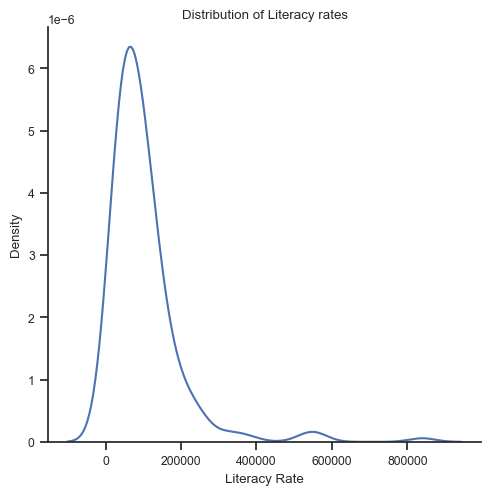

In [22]:
sns.displot(data_final["literacy_1524_no"], kind = "kde").set(xlabel = "Literacy Rate", title = "Distribution of Literacy rates")
#can be used to choose base value of literacy rate to see which countries are considered already literate 

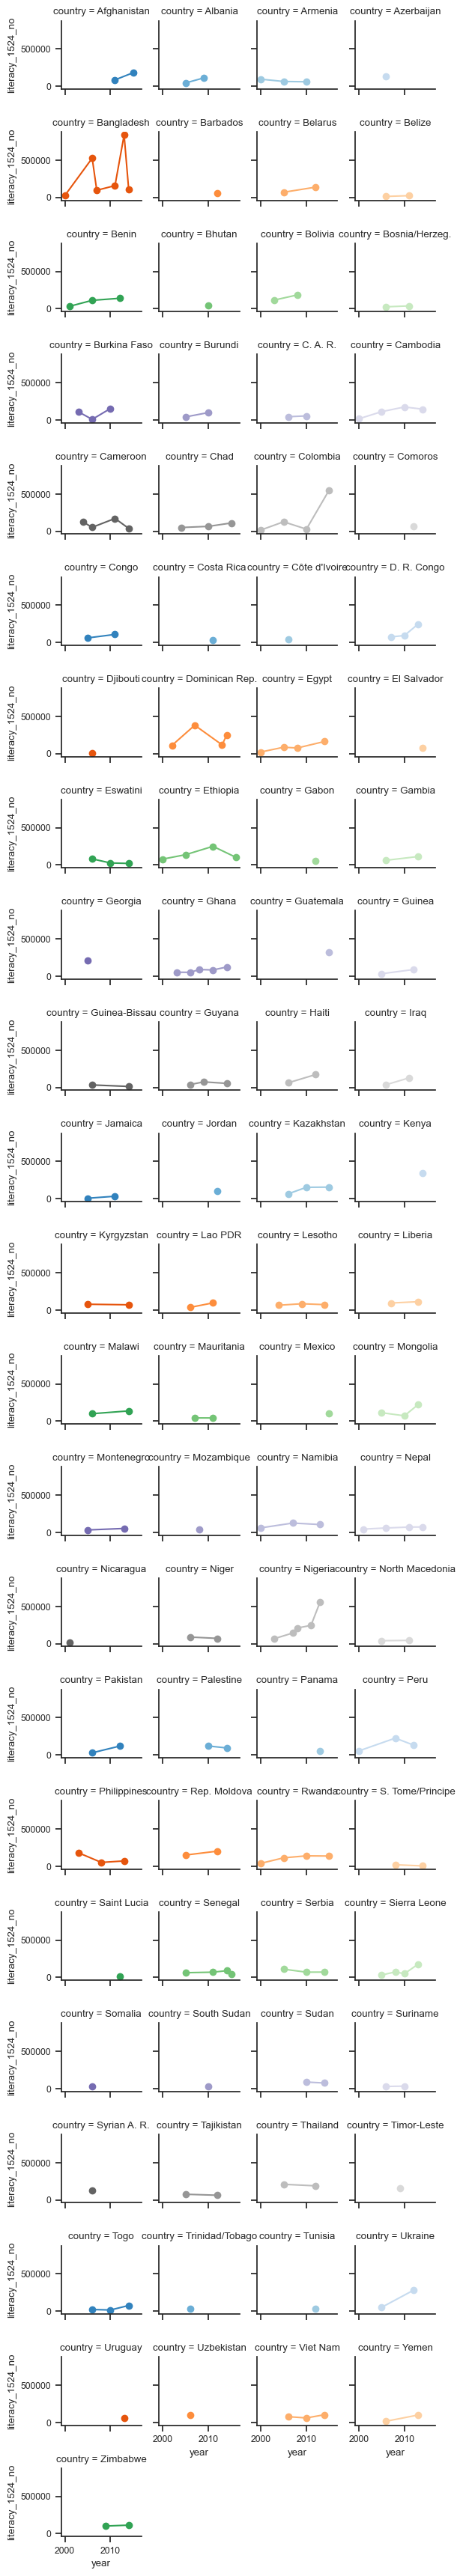

In [24]:
grid = sns.FacetGrid(data_final, col="country", hue="country", palette="tab20c", col_wrap=4, height=1.5)
grid.map(plt.plot, "year", "literacy_1524_no", marker="o")

## Research question/interests
**Has there been a positive or negative change in literacy rates in previosly literate and non-literate countries and what could be the factors affecting it?**

Briefly describe your research question or interests here.

I will first filter out the countries which have only 1 year of data. Then I will check the first year of data collected for literacy number of different countries to classify them as previously literate or non-literate. Then I will plot two facetgrids containing literate and non-literate countries and compare literacy rates over the years and try to find some reasons and factors that have affected literacy rates.(ex. Economy condition, War)